# XG-Boost

Group 2314:
- Gloria Isotton   ID: 2072705
- Sara Munafò      ID: 2072380
- Maryam Feizi     ID: 2091504
- Carlo Divari     ID: 1186975

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import tensorflow.random as tf_r
tf_r.set_seed(12345)

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15


In [2]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

XGBoost version: 1.7.3


In this notebook we test the performance of XGBoost on the classification task.

# 1. XG Boost vs DNN

Firstly, we compare the performance of XG-Boost on the classification task with the performance of a feedforward Deep neural network.    
In order to do so, we start from a dataset of $4000$ points binary-classificated and we compare the two performances for different sizes of the train set.

## Percentage N_train : 50%

In [47]:
np.random.seed(123)

perc=0.5
S = 2
N = 4000
N_train = int(perc*N)
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
        if x[n,1]<-0.5 and x[n,0]>0: y[n]=1
        if x[n,1]>(x[n,0]+2) and x[n,0]<0: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
L=x[0].shape[0]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 0
[ 0.87787588 -0.30757416] 0
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


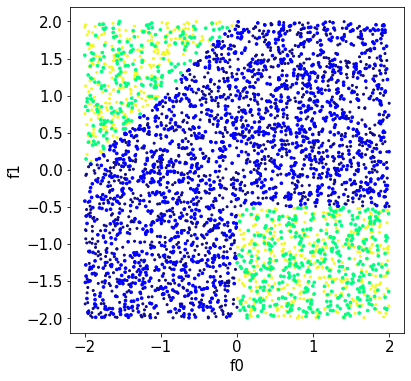

In [48]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="winter",s=7)
plt.show()

### - Deep Neural Network

In [53]:
def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [54]:
model_DNN = create_model()

In [55]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               verbose=2)

Epoch 1/400
40/40 - 0s - loss: 0.7097 - accuracy: 0.4245 - 261ms/epoch - 7ms/step
Epoch 2/400
40/40 - 0s - loss: 0.6540 - accuracy: 0.6755 - 27ms/epoch - 677us/step
Epoch 3/400
40/40 - 0s - loss: 0.6048 - accuracy: 0.6755 - 34ms/epoch - 848us/step
Epoch 4/400
40/40 - 0s - loss: 0.5449 - accuracy: 0.6790 - 29ms/epoch - 729us/step
Epoch 5/400
40/40 - 0s - loss: 0.4828 - accuracy: 0.7175 - 42ms/epoch - 1ms/step
Epoch 6/400
40/40 - 0s - loss: 0.4108 - accuracy: 0.7400 - 56ms/epoch - 1ms/step
Epoch 7/400
40/40 - 0s - loss: 0.3417 - accuracy: 0.9020 - 43ms/epoch - 1ms/step
Epoch 8/400
40/40 - 0s - loss: 0.2911 - accuracy: 0.9200 - 39ms/epoch - 986us/step
Epoch 9/400
40/40 - 0s - loss: 0.2515 - accuracy: 0.9300 - 38ms/epoch - 955us/step
Epoch 10/400
40/40 - 0s - loss: 0.2188 - accuracy: 0.9330 - 41ms/epoch - 1ms/step
Epoch 11/400
40/40 - 0s - loss: 0.1830 - accuracy: 0.9430 - 30ms/epoch - 747us/step
Epoch 12/400
40/40 - 0s - loss: 0.1605 - accuracy: 0.9495 - 34ms/epoch - 856us/step
Epoch 13/4

Epoch 99/400
40/40 - 0s - loss: 0.0193 - accuracy: 0.9925 - 35ms/epoch - 867us/step
Epoch 100/400
40/40 - 0s - loss: 0.0138 - accuracy: 0.9960 - 28ms/epoch - 707us/step
Epoch 101/400
40/40 - 0s - loss: 0.0169 - accuracy: 0.9935 - 41ms/epoch - 1ms/step
Epoch 102/400
40/40 - 0s - loss: 0.0173 - accuracy: 0.9935 - 45ms/epoch - 1ms/step
Epoch 103/400
40/40 - 0s - loss: 0.0147 - accuracy: 0.9960 - 46ms/epoch - 1ms/step
Epoch 104/400
40/40 - 0s - loss: 0.0140 - accuracy: 0.9965 - 52ms/epoch - 1ms/step
Epoch 105/400
40/40 - 0s - loss: 0.0167 - accuracy: 0.9945 - 34ms/epoch - 847us/step
Epoch 106/400
40/40 - 0s - loss: 0.0194 - accuracy: 0.9930 - 50ms/epoch - 1ms/step
Epoch 107/400
40/40 - 0s - loss: 0.0137 - accuracy: 0.9965 - 33ms/epoch - 833us/step
Epoch 108/400
40/40 - 0s - loss: 0.0138 - accuracy: 0.9950 - 42ms/epoch - 1ms/step
Epoch 109/400
40/40 - 0s - loss: 0.0150 - accuracy: 0.9945 - 31ms/epoch - 774us/step
Epoch 110/400
40/40 - 0s - loss: 0.0153 - accuracy: 0.9960 - 47ms/epoch - 1ms/

Epoch 196/400
40/40 - 0s - loss: 0.0100 - accuracy: 0.9965 - 26ms/epoch - 662us/step
Epoch 197/400
40/40 - 0s - loss: 0.0095 - accuracy: 0.9975 - 22ms/epoch - 561us/step
Epoch 198/400
40/40 - 0s - loss: 0.0123 - accuracy: 0.9950 - 27ms/epoch - 665us/step
Epoch 199/400
40/40 - 0s - loss: 0.0118 - accuracy: 0.9960 - 28ms/epoch - 697us/step
Epoch 200/400
40/40 - 0s - loss: 0.0118 - accuracy: 0.9955 - 30ms/epoch - 760us/step
Epoch 201/400
40/40 - 0s - loss: 0.0104 - accuracy: 0.9960 - 24ms/epoch - 601us/step
Epoch 202/400
40/40 - 0s - loss: 0.0195 - accuracy: 0.9920 - 26ms/epoch - 646us/step
Epoch 203/400
40/40 - 0s - loss: 0.0121 - accuracy: 0.9955 - 23ms/epoch - 574us/step
Epoch 204/400
40/40 - 0s - loss: 0.0099 - accuracy: 0.9975 - 25ms/epoch - 626us/step
Epoch 205/400
40/40 - 0s - loss: 0.0081 - accuracy: 0.9980 - 28ms/epoch - 702us/step
Epoch 206/400
40/40 - 0s - loss: 0.0093 - accuracy: 0.9970 - 26ms/epoch - 659us/step
Epoch 207/400
40/40 - 0s - loss: 0.0109 - accuracy: 0.9945 - 26ms

Epoch 293/400
40/40 - 0s - loss: 0.0090 - accuracy: 0.9970 - 24ms/epoch - 602us/step
Epoch 294/400
40/40 - 0s - loss: 0.0086 - accuracy: 0.9965 - 25ms/epoch - 628us/step
Epoch 295/400
40/40 - 0s - loss: 0.0074 - accuracy: 0.9975 - 27ms/epoch - 681us/step
Epoch 296/400
40/40 - 0s - loss: 0.0073 - accuracy: 0.9975 - 25ms/epoch - 614us/step
Epoch 297/400
40/40 - 0s - loss: 0.0068 - accuracy: 0.9965 - 30ms/epoch - 749us/step
Epoch 298/400
40/40 - 0s - loss: 0.0083 - accuracy: 0.9970 - 34ms/epoch - 844us/step
Epoch 299/400
40/40 - 0s - loss: 0.0102 - accuracy: 0.9970 - 32ms/epoch - 795us/step
Epoch 300/400
40/40 - 0s - loss: 0.0098 - accuracy: 0.9970 - 42ms/epoch - 1ms/step
Epoch 301/400
40/40 - 0s - loss: 0.0104 - accuracy: 0.9975 - 25ms/epoch - 628us/step
Epoch 302/400
40/40 - 0s - loss: 0.0087 - accuracy: 0.9975 - 38ms/epoch - 952us/step
Epoch 303/400
40/40 - 0s - loss: 0.0086 - accuracy: 0.9960 - 42ms/epoch - 1ms/step
Epoch 304/400
40/40 - 0s - loss: 0.0106 - accuracy: 0.9955 - 24ms/epo

Epoch 390/400
40/40 - 0s - loss: 0.0086 - accuracy: 0.9960 - 24ms/epoch - 606us/step
Epoch 391/400
40/40 - 0s - loss: 0.0082 - accuracy: 0.9970 - 28ms/epoch - 698us/step
Epoch 392/400
40/40 - 0s - loss: 0.0077 - accuracy: 0.9985 - 28ms/epoch - 697us/step
Epoch 393/400
40/40 - 0s - loss: 0.0066 - accuracy: 0.9965 - 23ms/epoch - 570us/step
Epoch 394/400
40/40 - 0s - loss: 0.0064 - accuracy: 0.9970 - 24ms/epoch - 601us/step
Epoch 395/400
40/40 - 0s - loss: 0.0062 - accuracy: 0.9970 - 27ms/epoch - 670us/step
Epoch 396/400
40/40 - 0s - loss: 0.0081 - accuracy: 0.9965 - 25ms/epoch - 633us/step
Epoch 397/400
40/40 - 0s - loss: 0.0077 - accuracy: 0.9980 - 26ms/epoch - 646us/step
Epoch 398/400
40/40 - 0s - loss: 0.0121 - accuracy: 0.9960 - 24ms/epoch - 611us/step
Epoch 399/400
40/40 - 0s - loss: 0.0116 - accuracy: 0.9950 - 26ms/epoch - 645us/step
Epoch 400/400
40/40 - 0s - loss: 0.0073 - accuracy: 0.9975 - 24ms/epoch - 600us/step


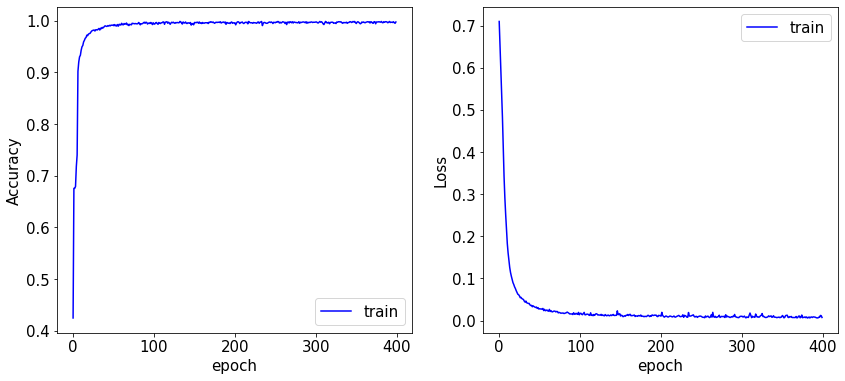

In [56]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [57]:
pred = model_DNN.predict(x_test)
count=0
for i in range(N_test):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1
    if pred[i]!=y_test[i]:
        count+=1
err1 = (count/N_test)*100
        
print('Error percentage:', err1, '%')

63/63 [==============================] - 0s 438us/step
Error percentage: 0.7000000000000001 %


In [12]:
score = model_DNN.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 899us/step - loss: 0.0047 - accuracy: 0.9980
Test loss: 0.004727901890873909
Test accuracy: 0.9980000257492065


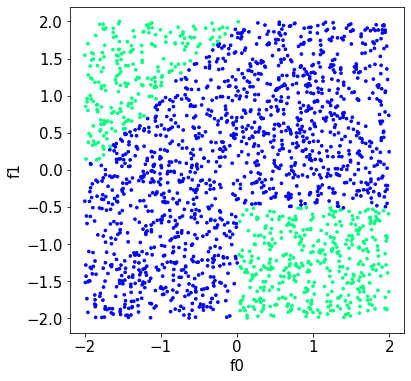

In [58]:
plt.figure(figsize=(6,6))
#scat(x_train,y_train)
scat(x_test,pred,cmap="winter",s=7)
plt.show()

### - XG Boost

In [42]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 1.45%


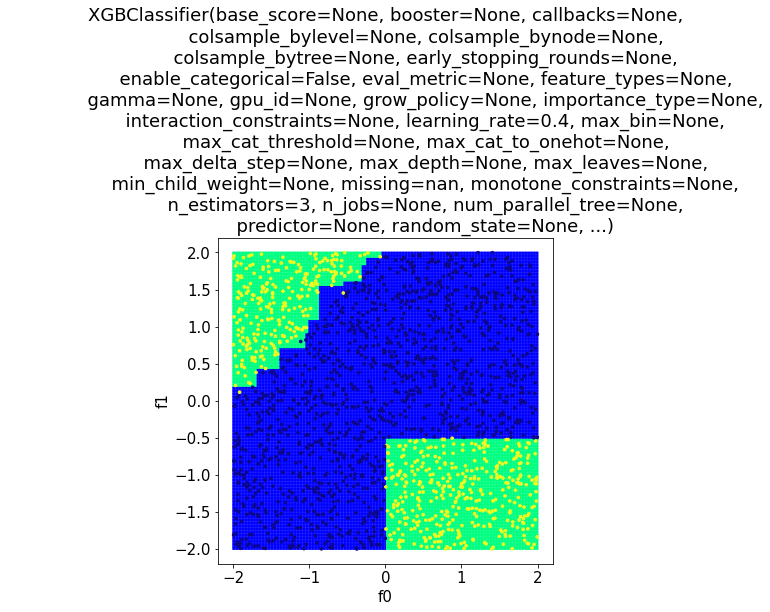

In [43]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.4,
                       reg_lambda=0.001, n_estimators=3),show=False)

## Percentage N_train : 62.5%

In [66]:
np.random.seed(123)

perc=0.625
S = 2
N = 4000
N_train = int(perc*N)
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
        if x[n,1]<-0.5 and x[n,0]>0: y[n]=1
        if x[n,1]>(x[n,0]+2) and x[n,0]<0: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
L=x[0].shape[0]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 0
[ 0.87787588 -0.30757416] 0
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


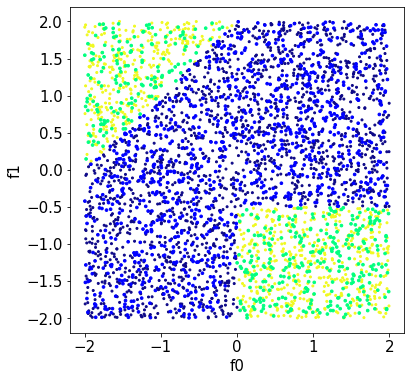

In [67]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="winter",s=7)
plt.show()

### - Deep Neural Network

In [73]:
def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [74]:
model_DNN = create_model()

In [75]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               verbose=2)

Epoch 1/400
50/50 - 0s - loss: 0.6546 - accuracy: 0.7340 - 269ms/epoch - 5ms/step
Epoch 2/400
50/50 - 0s - loss: 0.5235 - accuracy: 0.7956 - 27ms/epoch - 540us/step
Epoch 3/400
50/50 - 0s - loss: 0.4356 - accuracy: 0.8212 - 33ms/epoch - 651us/step
Epoch 4/400
50/50 - 0s - loss: 0.4101 - accuracy: 0.8296 - 37ms/epoch - 736us/step
Epoch 5/400
50/50 - 0s - loss: 0.3950 - accuracy: 0.8396 - 38ms/epoch - 753us/step
Epoch 6/400
50/50 - 0s - loss: 0.3849 - accuracy: 0.8404 - 30ms/epoch - 602us/step
Epoch 7/400
50/50 - 0s - loss: 0.3762 - accuracy: 0.8432 - 40ms/epoch - 802us/step
Epoch 8/400
50/50 - 0s - loss: 0.3674 - accuracy: 0.8516 - 47ms/epoch - 949us/step
Epoch 9/400
50/50 - 0s - loss: 0.3598 - accuracy: 0.8528 - 51ms/epoch - 1ms/step
Epoch 10/400
50/50 - 0s - loss: 0.3549 - accuracy: 0.8548 - 51ms/epoch - 1ms/step
Epoch 11/400
50/50 - 0s - loss: 0.3482 - accuracy: 0.8564 - 41ms/epoch - 824us/step
Epoch 12/400
50/50 - 0s - loss: 0.3449 - accuracy: 0.8584 - 33ms/epoch - 657us/step
Epoch 

Epoch 99/400
50/50 - 0s - loss: 0.1214 - accuracy: 0.9532 - 43ms/epoch - 864us/step
Epoch 100/400
50/50 - 0s - loss: 0.1219 - accuracy: 0.9512 - 34ms/epoch - 685us/step
Epoch 101/400
50/50 - 0s - loss: 0.1171 - accuracy: 0.9552 - 46ms/epoch - 919us/step
Epoch 102/400
50/50 - 0s - loss: 0.1137 - accuracy: 0.9536 - 27ms/epoch - 545us/step
Epoch 103/400
50/50 - 0s - loss: 0.1154 - accuracy: 0.9548 - 61ms/epoch - 1ms/step
Epoch 104/400
50/50 - 0s - loss: 0.1098 - accuracy: 0.9540 - 34ms/epoch - 679us/step
Epoch 105/400
50/50 - 0s - loss: 0.1027 - accuracy: 0.9584 - 32ms/epoch - 631us/step
Epoch 106/400
50/50 - 0s - loss: 0.1012 - accuracy: 0.9584 - 36ms/epoch - 714us/step
Epoch 107/400
50/50 - 0s - loss: 0.0991 - accuracy: 0.9604 - 43ms/epoch - 870us/step
Epoch 108/400
50/50 - 0s - loss: 0.0971 - accuracy: 0.9600 - 41ms/epoch - 815us/step
Epoch 109/400
50/50 - 0s - loss: 0.0943 - accuracy: 0.9604 - 41ms/epoch - 812us/step
Epoch 110/400
50/50 - 0s - loss: 0.0938 - accuracy: 0.9624 - 39ms/ep

Epoch 196/400
50/50 - 0s - loss: 0.0330 - accuracy: 0.9888 - 41ms/epoch - 818us/step
Epoch 197/400
50/50 - 0s - loss: 0.0230 - accuracy: 0.9948 - 35ms/epoch - 695us/step
Epoch 198/400
50/50 - 0s - loss: 0.0271 - accuracy: 0.9880 - 55ms/epoch - 1ms/step
Epoch 199/400
50/50 - 0s - loss: 0.0245 - accuracy: 0.9924 - 35ms/epoch - 694us/step
Epoch 200/400
50/50 - 0s - loss: 0.0283 - accuracy: 0.9920 - 50ms/epoch - 995us/step
Epoch 201/400
50/50 - 0s - loss: 0.0260 - accuracy: 0.9928 - 38ms/epoch - 759us/step
Epoch 202/400
50/50 - 0s - loss: 0.0218 - accuracy: 0.9936 - 32ms/epoch - 639us/step
Epoch 203/400
50/50 - 0s - loss: 0.0264 - accuracy: 0.9900 - 51ms/epoch - 1ms/step
Epoch 204/400
50/50 - 0s - loss: 0.0282 - accuracy: 0.9912 - 36ms/epoch - 712us/step
Epoch 205/400
50/50 - 0s - loss: 0.0334 - accuracy: 0.9884 - 44ms/epoch - 879us/step
Epoch 206/400
50/50 - 0s - loss: 0.0274 - accuracy: 0.9924 - 37ms/epoch - 731us/step
Epoch 207/400
50/50 - 0s - loss: 0.0278 - accuracy: 0.9904 - 29ms/epo

Epoch 293/400
50/50 - 0s - loss: 0.0209 - accuracy: 0.9932 - 46ms/epoch - 914us/step
Epoch 294/400
50/50 - 0s - loss: 0.0197 - accuracy: 0.9944 - 48ms/epoch - 967us/step
Epoch 295/400
50/50 - 0s - loss: 0.0174 - accuracy: 0.9944 - 34ms/epoch - 685us/step
Epoch 296/400
50/50 - 0s - loss: 0.0210 - accuracy: 0.9924 - 48ms/epoch - 956us/step
Epoch 297/400
50/50 - 0s - loss: 0.0151 - accuracy: 0.9948 - 46ms/epoch - 929us/step
Epoch 298/400
50/50 - 0s - loss: 0.0230 - accuracy: 0.9908 - 35ms/epoch - 698us/step
Epoch 299/400
50/50 - 0s - loss: 0.0243 - accuracy: 0.9908 - 48ms/epoch - 951us/step
Epoch 300/400
50/50 - 0s - loss: 0.0199 - accuracy: 0.9920 - 34ms/epoch - 688us/step
Epoch 301/400
50/50 - 0s - loss: 0.0182 - accuracy: 0.9936 - 43ms/epoch - 854us/step
Epoch 302/400
50/50 - 0s - loss: 0.0168 - accuracy: 0.9936 - 44ms/epoch - 883us/step
Epoch 303/400
50/50 - 0s - loss: 0.0192 - accuracy: 0.9932 - 47ms/epoch - 946us/step
Epoch 304/400
50/50 - 0s - loss: 0.0194 - accuracy: 0.9944 - 35ms

Epoch 390/400
50/50 - 0s - loss: 0.0244 - accuracy: 0.9920 - 32ms/epoch - 640us/step
Epoch 391/400
50/50 - 0s - loss: 0.0251 - accuracy: 0.9916 - 33ms/epoch - 650us/step
Epoch 392/400
50/50 - 0s - loss: 0.0204 - accuracy: 0.9948 - 33ms/epoch - 669us/step
Epoch 393/400
50/50 - 0s - loss: 0.0185 - accuracy: 0.9924 - 32ms/epoch - 642us/step
Epoch 394/400
50/50 - 0s - loss: 0.0148 - accuracy: 0.9952 - 33ms/epoch - 670us/step
Epoch 395/400
50/50 - 0s - loss: 0.0131 - accuracy: 0.9960 - 30ms/epoch - 607us/step
Epoch 396/400
50/50 - 0s - loss: 0.0149 - accuracy: 0.9952 - 31ms/epoch - 628us/step
Epoch 397/400
50/50 - 0s - loss: 0.0177 - accuracy: 0.9924 - 31ms/epoch - 620us/step
Epoch 398/400
50/50 - 0s - loss: 0.0191 - accuracy: 0.9924 - 31ms/epoch - 625us/step
Epoch 399/400
50/50 - 0s - loss: 0.0174 - accuracy: 0.9956 - 34ms/epoch - 676us/step
Epoch 400/400
50/50 - 0s - loss: 0.0151 - accuracy: 0.9940 - 42ms/epoch - 832us/step


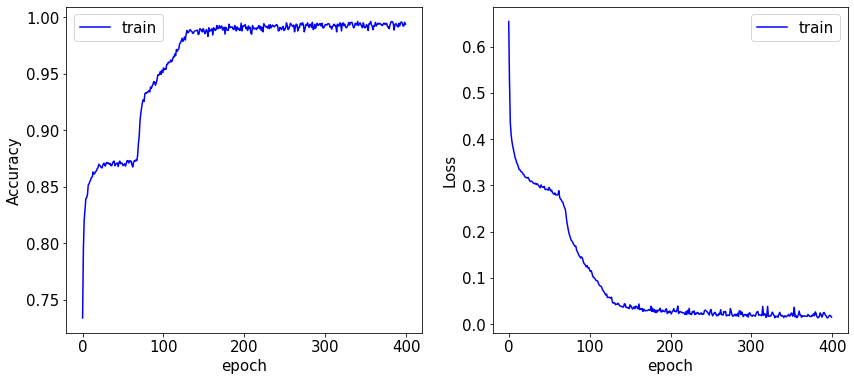

In [76]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [77]:
pred = model_DNN.predict(x_test)
count=0
for i in range(N_test):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1
    if pred[i]!=y_test[i]:
        count+=1
err1 = (count/N_test)*100
        
print('Error percentage:', err1, '%')

47/47 [==============================] - 0s 475us/step
Error percentage: 0.26666666666666666 %


In [78]:
score = model_DNN.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

47/47 [==============================] - 0s 514us/step - loss: 0.0137 - accuracy: 0.9973
Test loss: 0.013695713132619858
Test accuracy: 0.9973333477973938


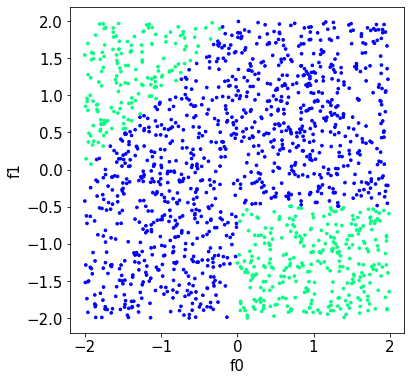

In [79]:
plt.figure(figsize=(6,6))
#scat(x_train,y_train)
scat(x_test,pred,cmap="winter",s=7)
plt.show()

### - XG Boost

In [80]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 1.00%


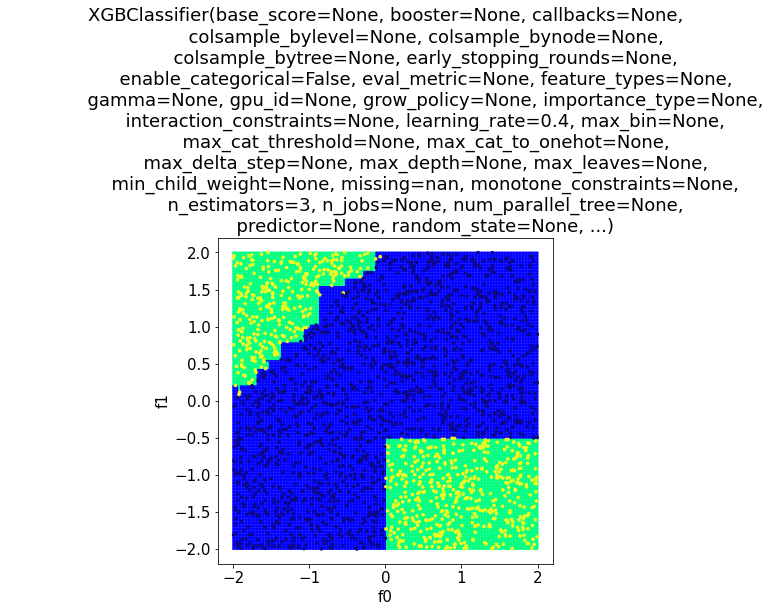

In [81]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.4,
                       reg_lambda=0.001, n_estimators=3),show=False)

## Percentage N_train : 75%

In [3]:
np.random.seed(123)

perc=0.75
S = 2
N = 4000
N_train = int(perc*N)
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
        if x[n,1]<-0.5 and x[n,0]>0: y[n]=1
        if x[n,1]>(x[n,0]+2) and x[n,0]<0: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
L=x[0].shape[0]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 0
[ 0.87787588 -0.30757416] 0
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


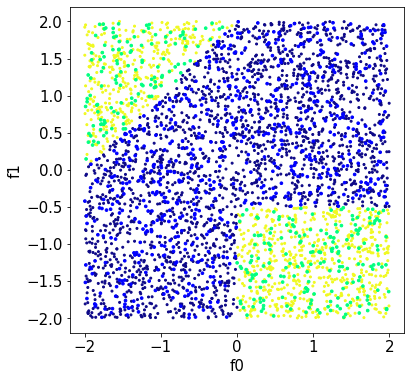

In [4]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="winter",s=7)
plt.show()

### - Deep Neural Network

In [7]:
def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [8]:
model_DNN = create_model()

In [9]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               verbose=2)

Epoch 1/400
60/60 - 0s - loss: 0.6508 - accuracy: 0.7220 - 381ms/epoch - 6ms/step
Epoch 2/400
60/60 - 0s - loss: 0.5239 - accuracy: 0.7710 - 68ms/epoch - 1ms/step
Epoch 3/400
60/60 - 0s - loss: 0.4375 - accuracy: 0.8083 - 70ms/epoch - 1ms/step
Epoch 4/400
60/60 - 0s - loss: 0.3986 - accuracy: 0.8273 - 65ms/epoch - 1ms/step
Epoch 5/400
60/60 - 0s - loss: 0.3700 - accuracy: 0.8397 - 54ms/epoch - 908us/step
Epoch 6/400
60/60 - 0s - loss: 0.3485 - accuracy: 0.8483 - 44ms/epoch - 737us/step
Epoch 7/400
60/60 - 0s - loss: 0.3248 - accuracy: 0.8597 - 37ms/epoch - 622us/step
Epoch 8/400
60/60 - 0s - loss: 0.3051 - accuracy: 0.8677 - 43ms/epoch - 715us/step
Epoch 9/400
60/60 - 0s - loss: 0.2864 - accuracy: 0.8703 - 57ms/epoch - 946us/step
Epoch 10/400
60/60 - 0s - loss: 0.2719 - accuracy: 0.8720 - 41ms/epoch - 685us/step
Epoch 11/400
60/60 - 0s - loss: 0.2579 - accuracy: 0.8730 - 65ms/epoch - 1ms/step
Epoch 12/400
60/60 - 0s - loss: 0.2481 - accuracy: 0.8747 - 30ms/epoch - 503us/step
Epoch 13/4

Epoch 99/400
60/60 - 0s - loss: 0.0233 - accuracy: 0.9913 - 37ms/epoch - 617us/step
Epoch 100/400
60/60 - 0s - loss: 0.0229 - accuracy: 0.9923 - 31ms/epoch - 520us/step
Epoch 101/400
60/60 - 0s - loss: 0.0224 - accuracy: 0.9913 - 46ms/epoch - 762us/step
Epoch 102/400
60/60 - 0s - loss: 0.0227 - accuracy: 0.9917 - 58ms/epoch - 961us/step
Epoch 103/400
60/60 - 0s - loss: 0.0221 - accuracy: 0.9937 - 42ms/epoch - 701us/step
Epoch 104/400
60/60 - 0s - loss: 0.0224 - accuracy: 0.9900 - 55ms/epoch - 921us/step
Epoch 105/400
60/60 - 0s - loss: 0.0234 - accuracy: 0.9913 - 42ms/epoch - 697us/step
Epoch 106/400
60/60 - 0s - loss: 0.0209 - accuracy: 0.9933 - 63ms/epoch - 1ms/step
Epoch 107/400
60/60 - 0s - loss: 0.0207 - accuracy: 0.9930 - 48ms/epoch - 799us/step
Epoch 108/400
60/60 - 0s - loss: 0.0189 - accuracy: 0.9937 - 42ms/epoch - 706us/step
Epoch 109/400
60/60 - 0s - loss: 0.0200 - accuracy: 0.9930 - 42ms/epoch - 697us/step
Epoch 110/400
60/60 - 0s - loss: 0.0203 - accuracy: 0.9933 - 47ms/ep

Epoch 196/400
60/60 - 0s - loss: 0.0169 - accuracy: 0.9943 - 31ms/epoch - 512us/step
Epoch 197/400
60/60 - 0s - loss: 0.0114 - accuracy: 0.9957 - 31ms/epoch - 520us/step
Epoch 198/400
60/60 - 0s - loss: 0.0115 - accuracy: 0.9963 - 32ms/epoch - 534us/step
Epoch 199/400
60/60 - 0s - loss: 0.0227 - accuracy: 0.9930 - 32ms/epoch - 528us/step
Epoch 200/400
60/60 - 0s - loss: 0.0128 - accuracy: 0.9943 - 44ms/epoch - 732us/step
Epoch 201/400
60/60 - 0s - loss: 0.0113 - accuracy: 0.9963 - 49ms/epoch - 824us/step
Epoch 202/400
60/60 - 0s - loss: 0.0137 - accuracy: 0.9960 - 34ms/epoch - 563us/step
Epoch 203/400
60/60 - 0s - loss: 0.0100 - accuracy: 0.9970 - 31ms/epoch - 508us/step
Epoch 204/400
60/60 - 0s - loss: 0.0141 - accuracy: 0.9967 - 30ms/epoch - 508us/step
Epoch 205/400
60/60 - 0s - loss: 0.0138 - accuracy: 0.9963 - 30ms/epoch - 506us/step
Epoch 206/400
60/60 - 0s - loss: 0.0125 - accuracy: 0.9947 - 32ms/epoch - 529us/step
Epoch 207/400
60/60 - 0s - loss: 0.0117 - accuracy: 0.9970 - 30ms

Epoch 293/400
60/60 - 0s - loss: 0.0094 - accuracy: 0.9963 - 52ms/epoch - 860us/step
Epoch 294/400
60/60 - 0s - loss: 0.0092 - accuracy: 0.9960 - 44ms/epoch - 730us/step
Epoch 295/400
60/60 - 0s - loss: 0.0172 - accuracy: 0.9930 - 57ms/epoch - 946us/step
Epoch 296/400
60/60 - 0s - loss: 0.0131 - accuracy: 0.9950 - 62ms/epoch - 1ms/step
Epoch 297/400
60/60 - 0s - loss: 0.0138 - accuracy: 0.9940 - 58ms/epoch - 965us/step
Epoch 298/400
60/60 - 0s - loss: 0.0079 - accuracy: 0.9973 - 51ms/epoch - 851us/step
Epoch 299/400
60/60 - 0s - loss: 0.0101 - accuracy: 0.9963 - 52ms/epoch - 870us/step
Epoch 300/400
60/60 - 0s - loss: 0.0137 - accuracy: 0.9943 - 39ms/epoch - 653us/step
Epoch 301/400
60/60 - 0s - loss: 0.0126 - accuracy: 0.9950 - 36ms/epoch - 594us/step
Epoch 302/400
60/60 - 0s - loss: 0.0116 - accuracy: 0.9967 - 56ms/epoch - 933us/step
Epoch 303/400
60/60 - 0s - loss: 0.0109 - accuracy: 0.9953 - 50ms/epoch - 840us/step
Epoch 304/400
60/60 - 0s - loss: 0.0117 - accuracy: 0.9957 - 66ms/e

Epoch 390/400
60/60 - 0s - loss: 0.0115 - accuracy: 0.9963 - 39ms/epoch - 650us/step
Epoch 391/400
60/60 - 0s - loss: 0.0104 - accuracy: 0.9947 - 31ms/epoch - 515us/step
Epoch 392/400
60/60 - 0s - loss: 0.0224 - accuracy: 0.9907 - 39ms/epoch - 647us/step
Epoch 393/400
60/60 - 0s - loss: 0.0057 - accuracy: 0.9983 - 53ms/epoch - 881us/step
Epoch 394/400
60/60 - 0s - loss: 0.0111 - accuracy: 0.9960 - 77ms/epoch - 1ms/step
Epoch 395/400
60/60 - 0s - loss: 0.0077 - accuracy: 0.9980 - 71ms/epoch - 1ms/step
Epoch 396/400
60/60 - 0s - loss: 0.0074 - accuracy: 0.9977 - 56ms/epoch - 935us/step
Epoch 397/400
60/60 - 0s - loss: 0.0085 - accuracy: 0.9967 - 76ms/epoch - 1ms/step
Epoch 398/400
60/60 - 0s - loss: 0.0121 - accuracy: 0.9953 - 72ms/epoch - 1ms/step
Epoch 399/400
60/60 - 0s - loss: 0.0125 - accuracy: 0.9957 - 62ms/epoch - 1ms/step
Epoch 400/400
60/60 - 0s - loss: 0.0070 - accuracy: 0.9967 - 54ms/epoch - 894us/step


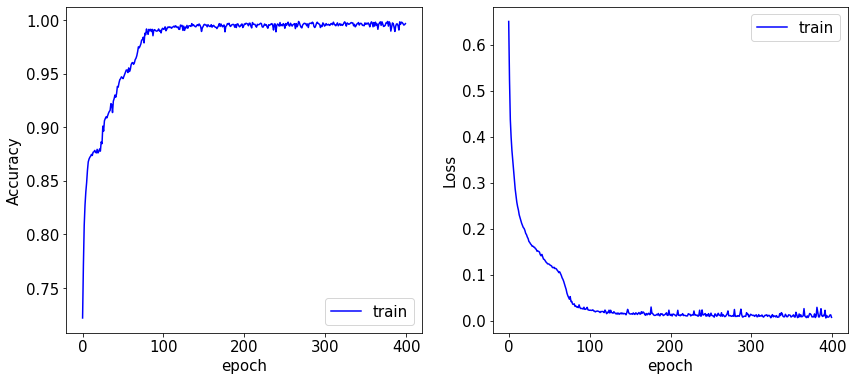

In [10]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [11]:
pred = model_DNN.predict(x_test)
count=0
for i in range(N_test):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1
    if pred[i]!=y_test[i]:
        count+=1
err1 = (count/N_test)*100
        
print('Error percentage:', err1, '%')

32/32 [==============================] - 0s 443us/step
Error percentage: 0.2 %


In [12]:
score = model_DNN.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 899us/step - loss: 0.0047 - accuracy: 0.9980
Test loss: 0.004727901890873909
Test accuracy: 0.9980000257492065


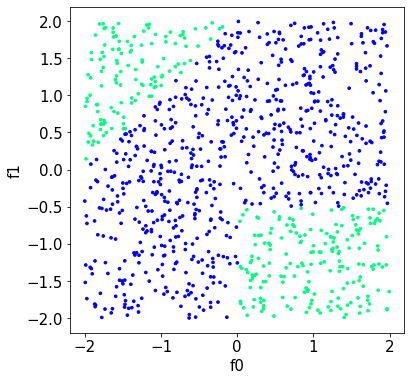

In [13]:
plt.figure(figsize=(6,6))
#scat(x_train,y_train)
scat(x_test,pred,cmap="winter",s=7)
plt.show()

### - XG Boost

In [14]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 1.30%


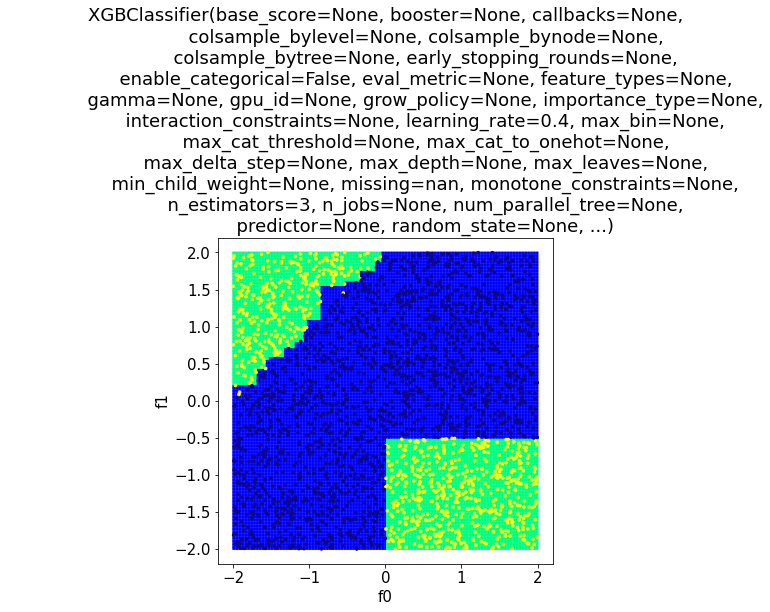

In [15]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.4,
                       reg_lambda=0.001, n_estimators=3),show=False)

## Percentage N_train= 87.5%

In [16]:
np.random.seed(123)

perc=0.875
S = 2
N = 4000
N_train = int(perc*N)
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
        if x[n,1]<-0.5 and x[n,0]>0: y[n]=1
        if x[n,1]>(x[n,0]+2) and x[n,0]<0: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 0
[ 0.87787588 -0.30757416] 0
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


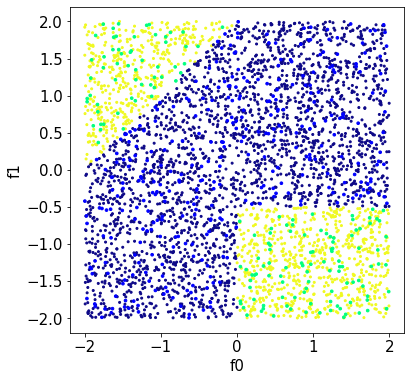

In [17]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="winter",s=7)
plt.show()

### - Deep Neural Network

In [18]:

def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [19]:
model_DNN = create_model()

In [20]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               verbose=2)

Epoch 1/400
70/70 - 0s - loss: 0.5992 - accuracy: 0.8183 - 328ms/epoch - 5ms/step
Epoch 2/400
70/70 - 0s - loss: 0.4381 - accuracy: 0.8374 - 58ms/epoch - 831us/step
Epoch 3/400
70/70 - 0s - loss: 0.3850 - accuracy: 0.8446 - 57ms/epoch - 814us/step
Epoch 4/400
70/70 - 0s - loss: 0.3654 - accuracy: 0.8460 - 63ms/epoch - 904us/step
Epoch 5/400
70/70 - 0s - loss: 0.3522 - accuracy: 0.8514 - 81ms/epoch - 1ms/step
Epoch 6/400
70/70 - 0s - loss: 0.3435 - accuracy: 0.8523 - 83ms/epoch - 1ms/step
Epoch 7/400
70/70 - 0s - loss: 0.3359 - accuracy: 0.8531 - 58ms/epoch - 824us/step
Epoch 8/400
70/70 - 0s - loss: 0.3314 - accuracy: 0.8540 - 60ms/epoch - 852us/step
Epoch 9/400
70/70 - 0s - loss: 0.3264 - accuracy: 0.8563 - 56ms/epoch - 806us/step
Epoch 10/400
70/70 - 0s - loss: 0.3232 - accuracy: 0.8586 - 65ms/epoch - 932us/step
Epoch 11/400
70/70 - 0s - loss: 0.3203 - accuracy: 0.8609 - 68ms/epoch - 975us/step
Epoch 12/400
70/70 - 0s - loss: 0.3162 - accuracy: 0.8634 - 58ms/epoch - 832us/step
Epoch 

Epoch 99/400
70/70 - 0s - loss: 0.2789 - accuracy: 0.8746 - 60ms/epoch - 856us/step
Epoch 100/400
70/70 - 0s - loss: 0.2839 - accuracy: 0.8729 - 66ms/epoch - 943us/step
Epoch 101/400
70/70 - 0s - loss: 0.2789 - accuracy: 0.8737 - 66ms/epoch - 939us/step
Epoch 102/400
70/70 - 0s - loss: 0.2794 - accuracy: 0.8729 - 65ms/epoch - 931us/step
Epoch 103/400
70/70 - 0s - loss: 0.2802 - accuracy: 0.8726 - 56ms/epoch - 802us/step
Epoch 104/400
70/70 - 0s - loss: 0.2784 - accuracy: 0.8731 - 60ms/epoch - 859us/step
Epoch 105/400
70/70 - 0s - loss: 0.2840 - accuracy: 0.8711 - 65ms/epoch - 924us/step
Epoch 106/400
70/70 - 0s - loss: 0.2776 - accuracy: 0.8740 - 61ms/epoch - 872us/step
Epoch 107/400
70/70 - 0s - loss: 0.2799 - accuracy: 0.8720 - 63ms/epoch - 903us/step
Epoch 108/400
70/70 - 0s - loss: 0.2809 - accuracy: 0.8714 - 61ms/epoch - 872us/step
Epoch 109/400
70/70 - 0s - loss: 0.2779 - accuracy: 0.8737 - 64ms/epoch - 912us/step
Epoch 110/400
70/70 - 0s - loss: 0.2765 - accuracy: 0.8746 - 64ms/

Epoch 196/400
70/70 - 0s - loss: 0.2178 - accuracy: 0.8997 - 42ms/epoch - 605us/step
Epoch 197/400
70/70 - 0s - loss: 0.2131 - accuracy: 0.9011 - 49ms/epoch - 706us/step
Epoch 198/400
70/70 - 0s - loss: 0.2151 - accuracy: 0.9006 - 53ms/epoch - 754us/step
Epoch 199/400
70/70 - 0s - loss: 0.2099 - accuracy: 0.9029 - 52ms/epoch - 745us/step
Epoch 200/400
70/70 - 0s - loss: 0.2079 - accuracy: 0.9049 - 50ms/epoch - 708us/step
Epoch 201/400
70/70 - 0s - loss: 0.2067 - accuracy: 0.9051 - 57ms/epoch - 815us/step
Epoch 202/400
70/70 - 0s - loss: 0.2083 - accuracy: 0.9051 - 54ms/epoch - 772us/step
Epoch 203/400
70/70 - 0s - loss: 0.2074 - accuracy: 0.9080 - 47ms/epoch - 669us/step
Epoch 204/400
70/70 - 0s - loss: 0.1957 - accuracy: 0.9149 - 61ms/epoch - 878us/step
Epoch 205/400
70/70 - 0s - loss: 0.1948 - accuracy: 0.9140 - 46ms/epoch - 651us/step
Epoch 206/400
70/70 - 0s - loss: 0.1931 - accuracy: 0.9154 - 54ms/epoch - 765us/step
Epoch 207/400
70/70 - 0s - loss: 0.1879 - accuracy: 0.9200 - 44ms

Epoch 293/400
70/70 - 0s - loss: 0.0183 - accuracy: 0.9960 - 55ms/epoch - 784us/step
Epoch 294/400
70/70 - 0s - loss: 0.0170 - accuracy: 0.9974 - 62ms/epoch - 889us/step
Epoch 295/400
70/70 - 0s - loss: 0.0174 - accuracy: 0.9963 - 70ms/epoch - 1ms/step
Epoch 296/400
70/70 - 0s - loss: 0.0213 - accuracy: 0.9929 - 67ms/epoch - 959us/step
Epoch 297/400
70/70 - 0s - loss: 0.0180 - accuracy: 0.9951 - 66ms/epoch - 947us/step
Epoch 298/400
70/70 - 0s - loss: 0.0240 - accuracy: 0.9920 - 58ms/epoch - 831us/step
Epoch 299/400
70/70 - 0s - loss: 0.0300 - accuracy: 0.9906 - 61ms/epoch - 877us/step
Epoch 300/400
70/70 - 0s - loss: 0.0198 - accuracy: 0.9949 - 56ms/epoch - 798us/step
Epoch 301/400
70/70 - 0s - loss: 0.0167 - accuracy: 0.9943 - 59ms/epoch - 844us/step
Epoch 302/400
70/70 - 0s - loss: 0.0253 - accuracy: 0.9914 - 66ms/epoch - 948us/step
Epoch 303/400
70/70 - 0s - loss: 0.0168 - accuracy: 0.9951 - 82ms/epoch - 1ms/step
Epoch 304/400
70/70 - 0s - loss: 0.0167 - accuracy: 0.9954 - 54ms/epo

Epoch 390/400
70/70 - 0s - loss: 0.0140 - accuracy: 0.9949 - 69ms/epoch - 983us/step
Epoch 391/400
70/70 - 0s - loss: 0.0104 - accuracy: 0.9960 - 64ms/epoch - 909us/step
Epoch 392/400
70/70 - 0s - loss: 0.0109 - accuracy: 0.9969 - 66ms/epoch - 943us/step
Epoch 393/400
70/70 - 0s - loss: 0.0089 - accuracy: 0.9974 - 98ms/epoch - 1ms/step
Epoch 394/400
70/70 - 0s - loss: 0.0111 - accuracy: 0.9946 - 84ms/epoch - 1ms/step
Epoch 395/400
70/70 - 0s - loss: 0.0147 - accuracy: 0.9954 - 66ms/epoch - 942us/step
Epoch 396/400
70/70 - 0s - loss: 0.0089 - accuracy: 0.9971 - 43ms/epoch - 615us/step
Epoch 397/400
70/70 - 0s - loss: 0.0156 - accuracy: 0.9963 - 55ms/epoch - 781us/step
Epoch 398/400
70/70 - 0s - loss: 0.0085 - accuracy: 0.9974 - 43ms/epoch - 618us/step
Epoch 399/400
70/70 - 0s - loss: 0.0103 - accuracy: 0.9963 - 52ms/epoch - 739us/step
Epoch 400/400
70/70 - 0s - loss: 0.0084 - accuracy: 0.9971 - 63ms/epoch - 906us/step


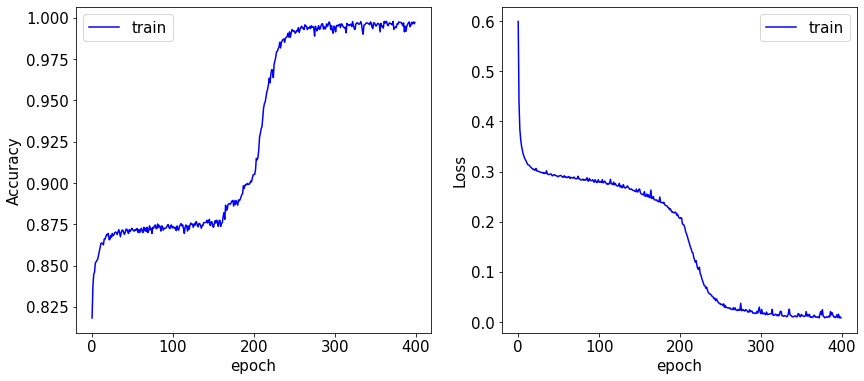

In [21]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [22]:
pred = model_DNN.predict(x_test)
count=0
for i in range(N_test):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1
    if pred[i]!=y_test[i]:
        count+=1
err1 = (count/N_test)*100
        
print('Error percentage:', err1, '%')

16/16 [==============================] - 0s 473us/step
Error percentage: 0.8 %


In [23]:
score = model_DNN.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 820us/step - loss: 0.0134 - accuracy: 0.9920
Test loss: 0.013389360159635544
Test accuracy: 0.9919999837875366


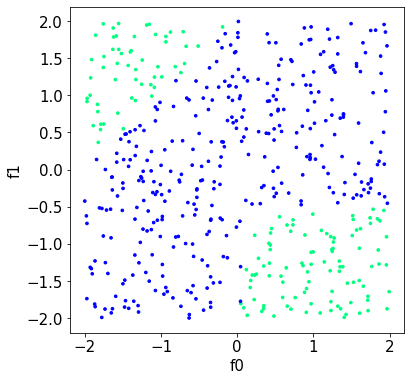

In [24]:
plt.figure(figsize=(6,6))
#scat(x_train,y_train)
scat(x_test,pred,cmap="winter",s=7)
plt.show()

### - XGBoost

In [25]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 1.20%


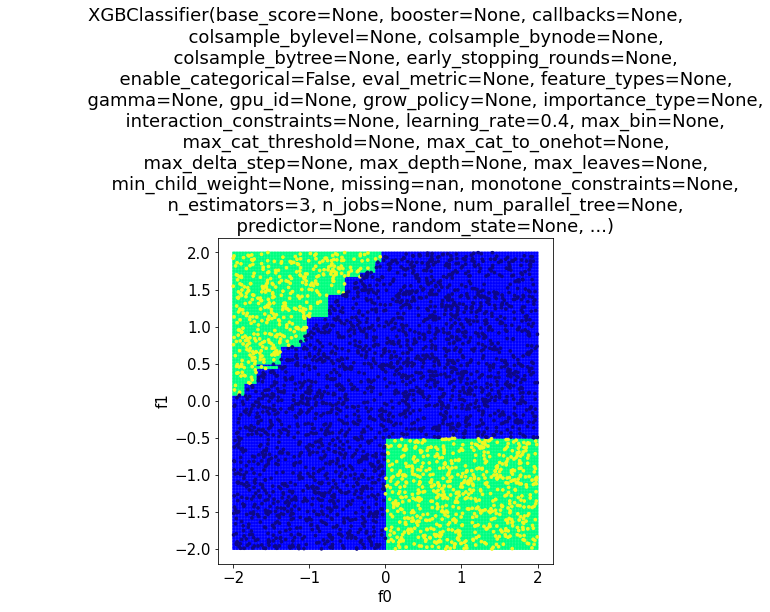

In [26]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.4,
                       reg_lambda=0.001, n_estimators=3),show=False)

## A try with a different dataset

With the previous dataset, we observed that DNN generally performed better on the classification task. This is due to the presence of a diagonal separating hyperplane in our datasets, which XGboost has more difficulties to precisely recreate, since it performs splits only horizontally or vertically.    
We show in the following cells the difference in performance with a different dataset, choosing the number of training samples for which it performed better, namely 2500 over 4000.

In [27]:
np.random.seed(123)

perc=0.75
S = 2
N = 4000
N_train = int(perc*N)
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
        if x[n,1]<-0.5 and x[n,0]>0: y[n]=1
        if x[n,1]>0.8 and x[n,0]<0: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 0
[ 0.87787588 -0.30757416] 0
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


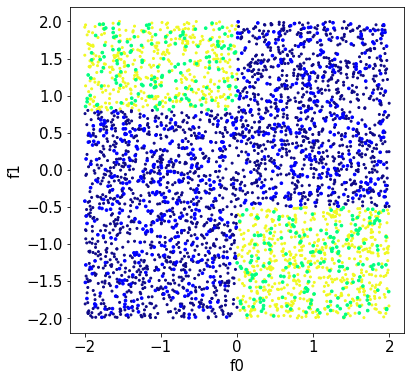

In [28]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="winter",s=7)
plt.show()

In [29]:
L=x[0].shape[0]

### - XG Boost

In [30]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 0.10%


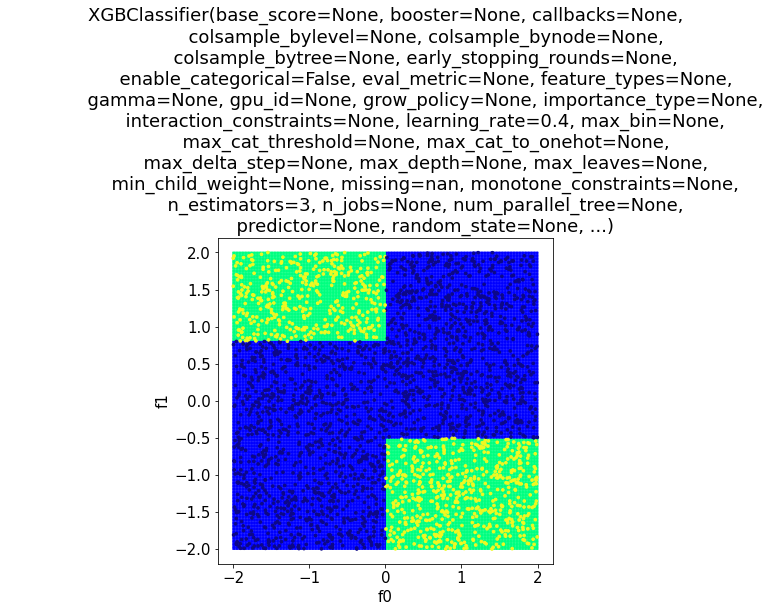

In [31]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.4,
                       reg_lambda=0.001, n_estimators=3),show=False)

As we expected, the percentage of error drops from $1%$ to $0.1%$.    
To test if, with a dataset more easy to learn for XGBoost, the DNN still outperforms it, we now train the DNN on this dataset.

### - Deep Neural network

In [32]:
def create_model(activation='relu',optimizer=keras.optimizers.Adam()):   #defined a function so it's easier to tune 
    model = Sequential()                                                 #activation and optimizer as parameters
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [33]:
model_DNN = create_model()

In [34]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               verbose=2)

Epoch 1/400
60/60 - 0s - loss: 0.6633 - accuracy: 0.7297 - 284ms/epoch - 5ms/step
Epoch 2/400
60/60 - 0s - loss: 0.5393 - accuracy: 0.8193 - 41ms/epoch - 681us/step
Epoch 3/400
60/60 - 0s - loss: 0.4291 - accuracy: 0.8360 - 55ms/epoch - 910us/step
Epoch 4/400
60/60 - 0s - loss: 0.3930 - accuracy: 0.8393 - 56ms/epoch - 926us/step
Epoch 5/400
60/60 - 0s - loss: 0.3756 - accuracy: 0.8457 - 30ms/epoch - 498us/step
Epoch 6/400
60/60 - 0s - loss: 0.3675 - accuracy: 0.8440 - 43ms/epoch - 710us/step
Epoch 7/400
60/60 - 0s - loss: 0.3599 - accuracy: 0.8460 - 48ms/epoch - 798us/step
Epoch 8/400
60/60 - 0s - loss: 0.3542 - accuracy: 0.8473 - 32ms/epoch - 537us/step
Epoch 9/400
60/60 - 0s - loss: 0.3506 - accuracy: 0.8463 - 40ms/epoch - 672us/step
Epoch 10/400
60/60 - 0s - loss: 0.3467 - accuracy: 0.8480 - 35ms/epoch - 589us/step
Epoch 11/400
60/60 - 0s - loss: 0.3434 - accuracy: 0.8507 - 40ms/epoch - 664us/step
Epoch 12/400
60/60 - 0s - loss: 0.3410 - accuracy: 0.8493 - 50ms/epoch - 831us/step
Ep

Epoch 99/400
60/60 - 0s - loss: 0.0713 - accuracy: 0.9670 - 34ms/epoch - 573us/step
Epoch 100/400
60/60 - 0s - loss: 0.0671 - accuracy: 0.9697 - 34ms/epoch - 563us/step
Epoch 101/400
60/60 - 0s - loss: 0.0654 - accuracy: 0.9687 - 35ms/epoch - 588us/step
Epoch 102/400
60/60 - 0s - loss: 0.0664 - accuracy: 0.9693 - 38ms/epoch - 637us/step
Epoch 103/400
60/60 - 0s - loss: 0.0642 - accuracy: 0.9717 - 36ms/epoch - 602us/step
Epoch 104/400
60/60 - 0s - loss: 0.0635 - accuracy: 0.9700 - 43ms/epoch - 709us/step
Epoch 105/400
60/60 - 0s - loss: 0.0653 - accuracy: 0.9700 - 48ms/epoch - 800us/step
Epoch 106/400
60/60 - 0s - loss: 0.0641 - accuracy: 0.9700 - 31ms/epoch - 512us/step
Epoch 107/400
60/60 - 0s - loss: 0.0636 - accuracy: 0.9723 - 39ms/epoch - 656us/step
Epoch 108/400
60/60 - 0s - loss: 0.0640 - accuracy: 0.9680 - 37ms/epoch - 612us/step
Epoch 109/400
60/60 - 0s - loss: 0.0622 - accuracy: 0.9720 - 30ms/epoch - 508us/step
Epoch 110/400
60/60 - 0s - loss: 0.0610 - accuracy: 0.9750 - 31ms/

Epoch 196/400
60/60 - 0s - loss: 0.0342 - accuracy: 0.9833 - 51ms/epoch - 850us/step
Epoch 197/400
60/60 - 0s - loss: 0.0333 - accuracy: 0.9840 - 32ms/epoch - 530us/step
Epoch 198/400
60/60 - 0s - loss: 0.0342 - accuracy: 0.9847 - 39ms/epoch - 650us/step
Epoch 199/400
60/60 - 0s - loss: 0.0340 - accuracy: 0.9837 - 44ms/epoch - 740us/step
Epoch 200/400
60/60 - 0s - loss: 0.0322 - accuracy: 0.9843 - 31ms/epoch - 520us/step
Epoch 201/400
60/60 - 0s - loss: 0.0320 - accuracy: 0.9850 - 47ms/epoch - 790us/step
Epoch 202/400
60/60 - 0s - loss: 0.0328 - accuracy: 0.9853 - 38ms/epoch - 638us/step
Epoch 203/400
60/60 - 0s - loss: 0.0334 - accuracy: 0.9837 - 40ms/epoch - 673us/step
Epoch 204/400
60/60 - 0s - loss: 0.0324 - accuracy: 0.9850 - 41ms/epoch - 682us/step
Epoch 205/400
60/60 - 0s - loss: 0.0315 - accuracy: 0.9870 - 44ms/epoch - 728us/step
Epoch 206/400
60/60 - 0s - loss: 0.0390 - accuracy: 0.9843 - 39ms/epoch - 655us/step
Epoch 207/400
60/60 - 0s - loss: 0.0315 - accuracy: 0.9867 - 42ms

Epoch 293/400
60/60 - 0s - loss: 0.0173 - accuracy: 0.9937 - 45ms/epoch - 743us/step
Epoch 294/400
60/60 - 0s - loss: 0.0148 - accuracy: 0.9940 - 51ms/epoch - 858us/step
Epoch 295/400
60/60 - 0s - loss: 0.0154 - accuracy: 0.9943 - 54ms/epoch - 903us/step
Epoch 296/400
60/60 - 0s - loss: 0.0164 - accuracy: 0.9927 - 50ms/epoch - 835us/step
Epoch 297/400
60/60 - 0s - loss: 0.0147 - accuracy: 0.9940 - 47ms/epoch - 785us/step
Epoch 298/400
60/60 - 0s - loss: 0.0167 - accuracy: 0.9913 - 50ms/epoch - 837us/step
Epoch 299/400
60/60 - 0s - loss: 0.0174 - accuracy: 0.9937 - 62ms/epoch - 1ms/step
Epoch 300/400
60/60 - 0s - loss: 0.0163 - accuracy: 0.9927 - 50ms/epoch - 838us/step
Epoch 301/400
60/60 - 0s - loss: 0.0171 - accuracy: 0.9927 - 45ms/epoch - 743us/step
Epoch 302/400
60/60 - 0s - loss: 0.0167 - accuracy: 0.9930 - 64ms/epoch - 1ms/step
Epoch 303/400
60/60 - 0s - loss: 0.0135 - accuracy: 0.9943 - 53ms/epoch - 883us/step
Epoch 304/400
60/60 - 0s - loss: 0.0163 - accuracy: 0.9933 - 47ms/epo

Epoch 390/400
60/60 - 0s - loss: 0.0107 - accuracy: 0.9960 - 46ms/epoch - 761us/step
Epoch 391/400
60/60 - 0s - loss: 0.0090 - accuracy: 0.9960 - 39ms/epoch - 650us/step
Epoch 392/400
60/60 - 0s - loss: 0.0108 - accuracy: 0.9963 - 46ms/epoch - 763us/step
Epoch 393/400
60/60 - 0s - loss: 0.0090 - accuracy: 0.9960 - 40ms/epoch - 670us/step
Epoch 394/400
60/60 - 0s - loss: 0.0087 - accuracy: 0.9957 - 51ms/epoch - 848us/step
Epoch 395/400
60/60 - 0s - loss: 0.0090 - accuracy: 0.9970 - 31ms/epoch - 510us/step
Epoch 396/400
60/60 - 0s - loss: 0.0078 - accuracy: 0.9977 - 36ms/epoch - 599us/step
Epoch 397/400
60/60 - 0s - loss: 0.0078 - accuracy: 0.9980 - 48ms/epoch - 804us/step
Epoch 398/400
60/60 - 0s - loss: 0.0103 - accuracy: 0.9947 - 39ms/epoch - 648us/step
Epoch 399/400
60/60 - 0s - loss: 0.0083 - accuracy: 0.9963 - 38ms/epoch - 630us/step
Epoch 400/400
60/60 - 0s - loss: 0.0093 - accuracy: 0.9963 - 36ms/epoch - 602us/step


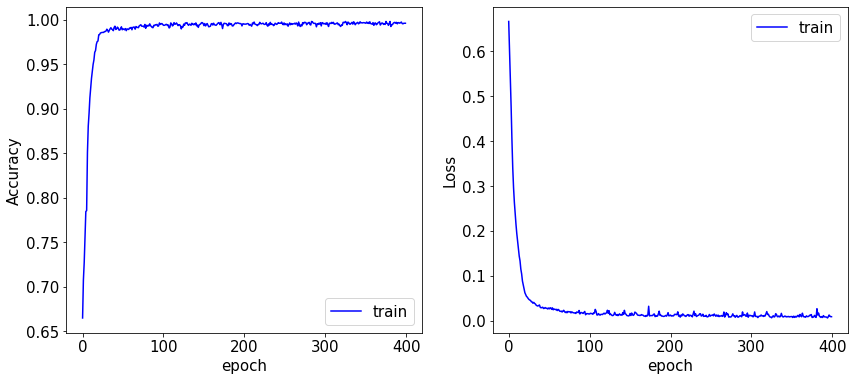

In [77]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [78]:
pred = model_DNN.predict(x_test)
count=0
for i in range(N_test):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1
    if pred[i]!=y_test[i]:
        count+=1
err1 = (count/N_test)*100
        
print('Error percentage:', err1, '%')

32/32 [==============================] - 0s 1ms/step
Error percentage: 0.7000000000000001 %


In [79]:
score = model_DNN.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 510us/step - loss: 0.0149 - accuracy: 0.9930
Test loss: 0.01489320956170559
Test accuracy: 0.9929999709129333


## Final results

In order to compare the performance of the two methods, namely XGBoost and the feed-forward Neural Network, in the binary classification task we run different simulations by varying the number of data samples in the training set. In particular, starting from a dataset of total size N=4000, we selected 4 training set sizes: 2000, 2500, 3000 and 3500. The following plot displays the result of the simulations in terms of the percentage of error in the test set, where $F_{train}$ stands for the fracion of training samples over the whole dataset.

In [84]:
perc=np.array([[1.45,0.7],[1,0.26],[1.3,0.2],[1.2,0.8]])
df_results = pd.DataFrame(perc,index=['0.5', '0.63','0.75','0.89'], columns=['XGBoost','NN'])

In [90]:
perc2=np.array([[0.1,0.7]])
df_results2 = pd.DataFrame(perc2,index=['0.63'], columns=['XGBoost','NN'])

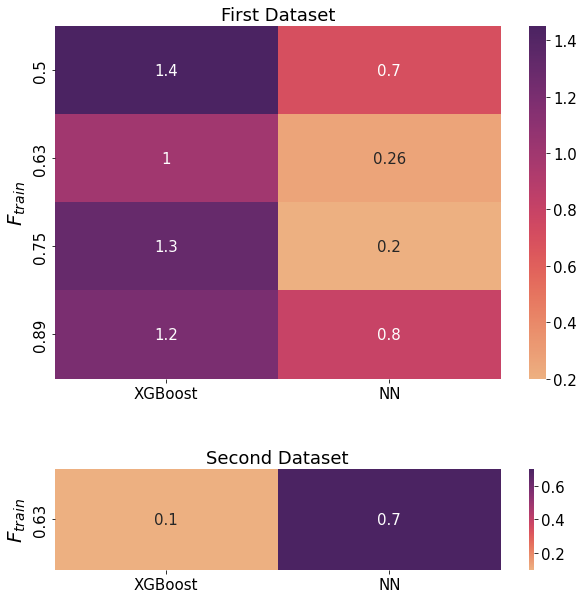

In [108]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),gridspec_kw={'height_ratios': [3.5, 1]})
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df_results, cmap='flare',ax=ax1, annot=True)
sns.heatmap(df_results2, cmap='flare',ax=ax2, annot=True)
ax1.set_ylabel('$F_{train}$', fontsize=20)
ax1.set_title('First Dataset')
ax2.set_ylabel('$F_{train}$', fontsize=20)
ax2.set_title('Second Dataset')


fig.subplots_adjust(wspace=0.001)
plt.show()

As we can see, the DNN outperforms XG-Boost on the classification task in the first dataset, since the separating hyperplane was not horizontal or vertical. In the second dataset, where this doesn't happen, XGboost reaches better results.    
In addition we notice how, in general, both methods work better with an intermediate training set size (between $60-75$%). When the fraction is too low, the percentage of error tends to grow, showing signs of underfitting; on the other hand, with a too large training dataset, the model goes in the direction of overfitting the data.

# Try different parameters (λ, γ, n_estimators, …)

In [ ]:
l_rates=[0.04,0.4,1]
reg_lambdas=[0.01,0.001,0.0001]
nums_estimators=[2,3,4]
for learning_rate in l_rates:
    classify(XGBClassifier(seed=42,
                           objective='binary:logistic',
                           #objective="reg:squarederror",eval_metric="rmse",
                           learning_rate=learning_rate,
                           reg_lambda=0.001, n_estimators=3),show=False)